In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import jieba.analyse
import gc
import datetime
from collections import Counter

### 开发者技能标签

参考链接：  

1.https://www.jb51.net/article/243626.htm

2.https://aistudio.baidu.com/aistudio/projectdetail/2210377?channelType=0&channel=0

3.https://blog.csdn.net/qq_50791662/article/details/123709658?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522166265318216800182111307%2522%252C%2522scm%2522%253A%252220140713.130102334.pc%255Fall.%2522%257D&request_id=166265318216800182111307&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~first_rank_ecpm_v1~pc_rank_34-1-123709658-null-null.142^v47^pc_rank_34_default_2,201^v3^control_1&utm_term=python%E5%9F%BA%E4%BA%8E%E8%87%AA%E5%BB%BA%E8%AF%AD%E6%96%99%E5%BA%93%E8%BF%9B%E8%A1%8C%E5%85%B3%E9%94%AE%E8%AF%8D%E6%8F%90%E5%8F%96&spm=1018.2226.3001.4187

In [2]:
#导入body这个字段来进行技能提取
data = pd.read_csv("paddle.csv",usecols=["body"])

/var/folders/v5/vrnscfp50517qvkjzr6km82m0000gn/T/ipykernel_7287/2149412570.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("paddle.csv",usecols=["body"])


In [3]:
data=data.dropna(how="all")
data.reset_index(drop=True,inplace=True)

In [4]:
data

,body
0,这里为什么要删呢？api不更新了么？\r\n
1,```\r\n$ git submodule update --init --recursi...
2,简单的问题复杂化了，13个因素如何检验与房价是具有线性相关性的？
3,this is better to be `startup_program`
4,this func result seems not be used?
...,...
494681,这里是为了减少一个set接口，因为winograd需要对filter进行转换，转换后的fil...
494682,改成fusion_dequant_add_relu?
494683,relu的输出是Out，不是Output，Output可能会出问题
494684,最好别在头文件中使用using吧


In [5]:
#这里利用TFIDF算法来进行关键词提取
t = jieba.analyse.TFIDF()
t.extract_tags("我喜欢你，你喜欢我吗",topK=5,withWeight=True)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/v5/vrnscfp50517qvkjzr6km82m0000gn/T/jieba.cache
Loading model cost 0.284 seconds.
Prefix dict has been built successfully.


[('喜欢', 5.70258840302)]

In [ ]:
#对data['body']每条日志数据进行关键词提取，然后存进res数组种
res=[]
t = jieba.analyse.TFIDF()
for i in range(data.shape[0]):
    if i % 10000 == 0:
        print(i)
    try:
        res.append(t.extract_tags(data["body"].iloc[i].lower(),topK=1,withWeight=True)[0][0])
    except IndexError:
        print(data["body"].iloc[i])

In [7]:
#对提取出来的关键词进行统计
temp = Counter(res)
skill = sorted(temp.items(), key = lambda x:x[1],reverse=True)

In [8]:
#过滤掉数量少于50的关键词
skill=[s for s in skill if s[1]>50]

In [ ]:
skill

In [10]:
#最后提取的开发者技能如下
skills=[
 ('paddle', 12421),
 ('paddlepaddle', 2009),
 ('gpu', 1568),
 ('python', 1454),
 ('tensor', 1212),
 ('cpu', 923),
 ('cuda', 895),
 ('aistudio', 741),
 ('docker', 710),
 ('paddlehub', 708),
 ('paddledetection', 617),
 ('inference', 613),
 ('paddlex', 517),
 ('infer', 509),
 ('cudnn', 508),
 ('paddlenlp', 501),
 ('github', 486),
 ('paddleocr', 486),
 ('serving', 481),
 ('windows', 454),
 ('onnx', 435),
 ('c++', 428),
 ('tensorrt', 334),
 ('ocr', 327),
 ('x2paddle', 294),
 ('paddleseg', 293),
 ('optimizer', 248),
 ('yolov3', 235),
 ('opencl', 203),
 ('ppyolo', 199),
 ('paddleclas', 192),
 ('cpp', 187),
 ('pytorch', 186),
 ('linux', 180),
 ('conv2d', 177),
 ('tensorflow', 161),
 ('paddleslim', 160),
 ('paddle2onnx', 157),
 ('推理', 157),
 ('bert', 156),
 ('lstm', 156),
 ('gcc', 151),
 ('量化', 150),
 ('dataloader', 148),
 ('torch', 147),
 ('飞桨', 144),
 ('rnn', 141),
 ('nvidia', 137),
 ('lodtensor', 116),
 ('paddlespeech', 116),
 ('paddlelite', 115),
 ('python3', 114),
 ('ppdet', 106),
 ('quant', 106),
 ('剪枝', 103),
 ('conda', 103),
 ('transformer', 95),
 ('rcnn', 92),
 ('openvino', 91),
 ('optimize', 81),
 ('paddlecloud', 79),
 ('paddle2.0', 76),
 ('transforms', 73),
 ('tokenizer', 71),
 ('cv2', 69),
 ('java', 68),
 ('ppocr', 68),
 ('detection', 67),
 ('openblas', 67),
 ('transform', 66),
 ('python3.7', 65),
 ('nnadapter', 65),
 ('distributed', 63),
 ('yolox', 63),
 ('裁剪', 61),
 ('shell', 59),
 ('cv', 57),
 ('可视化', 53),
 ('分布式', 53),
 ('paddlerec', 53),
 ('eiseg', 53),
 ('yolov4', 52),
 ('cloud', 51),
 ]

In [11]:
#将skills导出到words.txt中
words=open('words.txt',mode='w')

In [12]:
for i in range(len(skills)):
    for j in range(skills[i][1]):
        words.write(skills[i][0])
        words.write("\n")
words.close()
     

生成词云,参考链接：https://aistudio.baidu.com/aistudio/projectdetail/1071643?channelType=0&channel=0

In [13]:
#wordcloud模块用于生成词云图
from wordcloud import WordCloud,ImageColorGenerator
#matplotlib是一个Python的第三方库，里面的pyplot可以用来作图
import jieba
import matplotlib.pyplot as plt
#scipy用于处理图像文件，imread()返回ndarray对象，即 numpy 下的多维数组对象
#from scipy import 
from imageio import imread

/var/folders/v5/vrnscfp50517qvkjzr6km82m0000gn/T/ipykernel_7287/185436128.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  bg_pic = imread('tree.png')


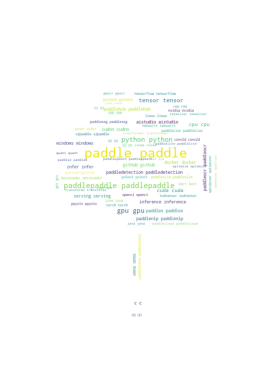

In [14]:
#读取一个txt文件
text = open('words.txt','r',encoding="utf-8").read()

#读入背景图片
bg_pic = imread('tree.png')
#生成词云图片
wordcloud = WordCloud(mask=bg_pic,background_color='white',scale=1.5).generate(text)
'''参数说明：
mask:设置背景图片   background_color:设置背景颜色
scale:按照比例进行放大画布，此处指长和宽都是原来画布的1.5倍
generate(text)：根据文本生成词云 '''

#产生背景图片，基于彩色图像的颜色生成器
image_colors = ImageColorGenerator(bg_pic)
#绘制词云图片
plt.imshow(wordcloud)
#显示图片时不显示坐标尺寸
plt.axis('off')
#显示词云图片
plt.show()
#保存图片
wordcloud.to_file('tree词云.png')

In [15]:
#清楚内存和变量
del data
gc.collect()

2053

### 开发者所在的组织分析

In [16]:
#导入push_commits.email字段数据
data = pd.read_csv("paddle.csv",usecols=["push_commits.email"])

In [17]:
data=data[data["push_commits.email"] != '[]']
data.reset_index(drop=True,inplace=True)

In [18]:
data

,push_commits.email
0,['99e7230bbd8a086b5eb37befe832b721fe409432@amd...
1,['f3ce4b63c7673b41bc56f0e315e6a2612c5bfa6f@bai...
2,['99e7230bbd8a086b5eb37befe832b721fe409432@amd...
3,['f3ce4b63c7673b41bc56f0e315e6a2612c5bfa6f@bai...
4,['99e7230bbd8a086b5eb37befe832b721fe409432@amd...
...,...
70255,['d798e66d36dc4f69bb7eaaedcffa66f9206e5432@gma...
70256,['aba0b3975ab872d51533db23dd12d77e3b95daf7@163...
70257,['07b5d9b651da5805a63d79c73eb29529e3ff711d@bai...
70258,['6b0c1435f69ec143e91a07abfa2caa7910629c2d@int...


In [19]:
emails=[]

In [20]:
#对push_commits.email字段进行处理，提取出@后面的字段
data["push_commits.email"].map(lambda x: emails.extend(list(set(x.replace("'","").replace("[","").replace("]","").split(",")))))

0        None
1        None
2        None
3        None
4        None
         ... 
70255    None
70256    None
70257    None
70258    None
70259    None
Name: push_commits.email, Length: 70260, dtype: object

In [ ]:
emails

In [22]:
organizations=[]

In [23]:
for i in range(len(emails)):
    try:	#写一个 try 把可能出错的代码放进去。
        organizations.append(emails[i].split("@")[1])
    except IndexError as e:# 写一个except
        print(emails[i])
    

fae191c09d734da5573d6b431e75c5f83f0ef692
fae191c09d734da5573d6b431e75c5f83f0ef692
2ba79a81bd09dde81867575b761cd8d556303f8d
c29d2d7d91847c1855aadfe49f20478e359e7430
d27e6061286198cc84eca7d1c1ed276fdf41f08b
zhangjin12138
d27e6061286198cc84eca7d1c1ed276fdf41f08b
3a41f38cedf2c009f013a3820b6d0f396ed13384
3a41f38cedf2c009f013a3820b6d0f396ed13384
3a41f38cedf2c009f013a3820b6d0f396ed13384
3a41f38cedf2c009f013a3820b6d0f396ed13384
158f99446875272f46baede00c37b42ac3287021
660fbf1b894cf87b5e82da63c9fba34240012ede
158f99446875272f46baede00c37b42ac3287021
158f99446875272f46baede00c37b42ac3287021
158f99446875272f46baede00c37b42ac3287021
9a76a857ad399b492ba01879d0fa2d717e4430b2
fcd260e33e89f9e48e6fa5fc5a9058bd9e7a054d
7e4c11485240bd6118cd02a4b7eae9e1371af924
c9a536b4c565d254e25802baa7972eb4d7265f93


In [ ]:
organizations

In [25]:
#进行词频统计
temp = Counter(organizations)
print (dict(temp))

{'amd.com': 29, 'users.noreply.github.com': 19793, 'baidu.com': 25834, 'gmail.com': 8979, 'mails.ucas.ac.cn': 41, '163.com': 9512, 'icloud.com': 10, '126.com': 2659, 'intel.com': 867, 'qq.com': 11546, 'hotmail.com': 607, 'outlook.com': 1437, 'student.swin.edu.au': 1, 'seas.upenn.edu': 18, 'yeah.net': 228, 'yq01-gpu-255-129-11-00.epc.baidu.com': 3, '139.com': 67, 'ethanbai.com': 199, 'yq01-qianmo-com-255-100-15.yq01.baidu.com': 1, 'live.com': 216, 'bit.edu.cn': 603, 'ucsd.edu': 85, 'instance-e7264l8j.bcc-szth.baidu.com': 1, 'gamil.com': 3, 'foxmail.com': 1595, 'cloudopt.net': 1, 'live.cn': 147, 'ufoym.com': 1, 'yq01-qianmo-com-255-129-12.yq01.baidu.com': 5, 'yq01-ps-201704-m12-heng0.yq01.baidu.com': 2, 'github.com': 83, 'example.com': 16, 'nervana-skx42.fm.intel.com': 1, 'yq01-gpu-255-142-20-00.epc.baidu.com': 1, 'sina.cn': 104, 'yq01-gpu-151-22-00.epc.baidu.com': 3, 'orange.com': 5, 'stu.hit.edu.cn': 2, 'aliyun.com': 59, 'sina.com': 308, 'instance-0trrqgec-3.novalocal': 4, 'mail.ustc.e

In [26]:
res = sorted(temp.items(), key = lambda x:x[1],reverse=True)

In [ ]:
res

In [28]:
del data,temp,organizations,res,emails
gc.collect()

0

### 开发者所在的时区分析

In [29]:
#导入actor_id和created_at字段
data = pd.read_csv("paddle.csv",usecols=["actor_id","created_at"])

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802652 entries, 0 to 802651
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   actor_id    802652 non-null  int64 
 1   created_at  802652 non-null  object
dtypes: int64(1), object(1)
memory usage: 12.2+ MB


In [31]:
#转化为日期类型
data["created_at"] = pd.to_datetime(data["created_at"])

In [32]:
#根据actor_id字段进行聚合统计
df=data.groupby(['actor_id']).count().reset_index(drop=False).rename(columns={'created_at':'times'}).sort_values(by="times",ascending=False)

In [33]:
#找出活跃次数超过50的开发者
df=df[df.times>50].reset_index(drop=True)

In [34]:
df

,actor_id,times
0,63029101,91820
1,6836917,14613
2,7845005,10542
3,728699,6662
4,19339784,5776
...,...,...
904,93587614,51
905,3112825,51
906,20597775,51
907,21244547,51


In [ ]:
#参考这篇文章进行开发者时区的统计分析：http://oss.x-lab.info/github-insight-report-2020.pdf
zones=[]
for i in range(len(df)):
    id=df.actor_id.values[i]
    temp=data[data.actor_id==id]
    temp["hour"]=temp.created_at.dt.strftime("%H").astype(int)
    k=max(temp['hour'].value_counts(normalize=True).index[:12])
    if(k>8):
        zone = 20 - k
    else:
        zone = -4 - k
    zones.append(zone)


In [36]:
pd.DataFrame(zones).value_counts()

 7     272
 6     201
 5     138
 8      91
 4      56
-3      50
 3      43
 9      11
 2       9
 10      8
-1       7
 11      7
-2       6
 1       5
 0       4
-5       1
dtype: int64

(array([  1.,  56.,   7.,   9.,   9.,  99., 339., 272., 102.,  15.]),
 array([-5. , -3.4, -1.8, -0.2,  1.4,  3. ,  4.6,  6.2,  7.8,  9.4, 11. ]),
 <BarContainer object of 10 artists>)

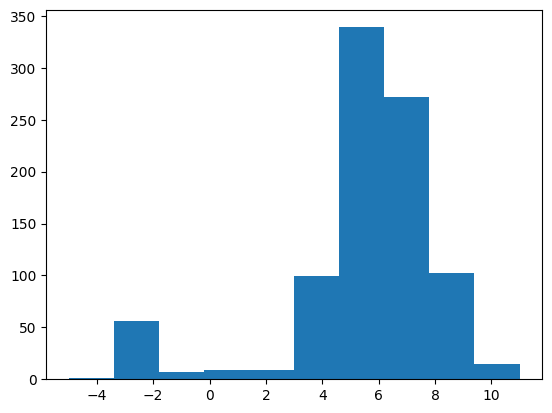

In [37]:
plt.hist(zones)

### 10名典型开发者时区分析

In [38]:
#'luotao1'所在的时区
id=6836917
temp=data[data.actor_id==id]
temp["hour"]=temp.created_at.dt.strftime("%H").astype(int)
k=max(temp['hour'].value_counts(normalize=True).index[:12])
if(k>8):
    zone = 20 - k
else:
    zone = -4 - k
print(zone)


7


/var/folders/v5/vrnscfp50517qvkjzr6km82m0000gn/T/ipykernel_7287/1785626492.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["hour"]=temp.created_at.dt.strftime("%H").astype(int)


In [39]:
#'qingqing01'所在的时区
id=7845005
temp=data[data.actor_id==id]
temp["hour"]=temp.created_at.dt.strftime("%H").astype(int)
k=max(temp['hour'].value_counts(normalize=True).index[:12])
if(k>8):
    zone = 20 - k
else:
    zone = -4 - k
print(zone)


7


/var/folders/v5/vrnscfp50517qvkjzr6km82m0000gn/T/ipykernel_7287/2213589798.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["hour"]=temp.created_at.dt.strftime("%H").astype(int)


In [40]:
#'reyoung'所在的时区
id=728699
temp=data[data.actor_id==id]
temp["hour"]=temp.created_at.dt.strftime("%H").astype(int)


/var/folders/v5/vrnscfp50517qvkjzr6km82m0000gn/T/ipykernel_7287/374597300.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["hour"]=temp.created_at.dt.strftime("%H").astype(int)


In [41]:
#所在时区应该为8
temp['hour'].value_counts(normalize=True)

2     0.113329
3     0.098019
8     0.095617
4     0.093215
7     0.090964
6     0.082858
5     0.081807
9     0.072801
10    0.042630
11    0.034074
1     0.021915
21    0.019514
12    0.018913
22    0.018463
23    0.015911
17    0.015461
18    0.015461
13    0.015011
14    0.014260
20    0.012159
0     0.011108
19    0.007505
15    0.006004
16    0.003002
Name: hour, dtype: float64

In [42]:
#'Xreki'所在的时区
id=12538138
temp=data[data.actor_id==id]
temp["hour"]=temp.created_at.dt.strftime("%H").astype(int)
k=max(temp['hour'].value_counts(normalize=True).index[:12])
if(k>8):
    zone = 20 - k
else:
    zone = -4 - k
print(zone)

7


/var/folders/v5/vrnscfp50517qvkjzr6km82m0000gn/T/ipykernel_7287/2227208829.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["hour"]=temp.created_at.dt.strftime("%H").astype(int)


In [43]:
#'chenwhql'所在的时区
id=22561442
temp=data[data.actor_id==id]
temp["hour"]=temp.created_at.dt.strftime("%H").astype(int)
k=max(temp['hour'].value_counts(normalize=True).index[:12])
if(k>8):
    zone = 20 - k
else:
    zone = -4 - k
print(zone)

7


/var/folders/v5/vrnscfp50517qvkjzr6km82m0000gn/T/ipykernel_7287/1399776868.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["hour"]=temp.created_at.dt.strftime("%H").astype(int)


In [44]:
#'typhoonzero'所在的时区
id=13348433
temp=data[data.actor_id==id]
temp["hour"]=temp.created_at.dt.strftime("%H").astype(int)
k=max(temp['hour'].value_counts(normalize=True).index[:12])
if(k>8):
    zone = 20 - k
else:
    zone = -4 - k
print(zone)


8


/var/folders/v5/vrnscfp50517qvkjzr6km82m0000gn/T/ipykernel_7287/819215340.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["hour"]=temp.created_at.dt.strftime("%H").astype(int)


In [45]:
#'TCChenlong'所在的时区
id=11935832
temp=data[data.actor_id==id]
temp["hour"]=temp.created_at.dt.strftime("%H").astype(int)
k=max(temp['hour'].value_counts(normalize=True).index[:12])
if(k>8):
    zone = 20 - k
else:
    zone = -4 - k
print(zone)

8


/var/folders/v5/vrnscfp50517qvkjzr6km82m0000gn/T/ipykernel_7287/2226373186.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["hour"]=temp.created_at.dt.strftime("%H").astype(int)


In [46]:
#'gongweibao'所在的时区
id=10721757
temp=data[data.actor_id==id]
temp["hour"]=temp.created_at.dt.strftime("%H").astype(int)
k=max(temp['hour'].value_counts(normalize=True).index[:12])
if(k>8):
    zone = 20 - k
else:
    zone = -4 - k
print(zone)

8


/var/folders/v5/vrnscfp50517qvkjzr6km82m0000gn/T/ipykernel_7287/885864616.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["hour"]=temp.created_at.dt.strftime("%H").astype(int)


In [47]:
#'littletomatodonkey'所在的时区
id=14270174
temp=data[data.actor_id==id]
temp["hour"]=temp.created_at.dt.strftime("%H").astype(int)
k=max(temp['hour'].value_counts(normalize=True).index[:12])
if(k>8):
    zone = 20 - k
else:
    zone = -4 - k
print(zone)

7


/var/folders/v5/vrnscfp50517qvkjzr6km82m0000gn/T/ipykernel_7287/3747123620.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["hour"]=temp.created_at.dt.strftime("%H").astype(int)


In [48]:
#'wangkuiyi'所在的时区
id=1548775
temp=data[data.actor_id==id]
temp["hour"]=temp.created_at.dt.strftime("%H").astype(int)
k=max(temp['hour'].value_counts(normalize=True).index[:12])
if(k>8):
    zone = 20 - k
else:
    zone = -4 - k
print(zone)

-3


/var/folders/v5/vrnscfp50517qvkjzr6km82m0000gn/T/ipykernel_7287/1613414860.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["hour"]=temp.created_at.dt.strftime("%H").astype(int)


In [49]:
#'wangkuiyi'所在的时区
id=1548775
temp=data[data.actor_id==id]
temp["hour"]=temp.created_at.dt.strftime("%H").astype(int)
temp['hour'].value_counts(normalize=True)

/var/folders/v5/vrnscfp50517qvkjzr6km82m0000gn/T/ipykernel_7287/960110664.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["hour"]=temp.created_at.dt.strftime("%H").astype(int)


23    0.079088
18    0.075890
0     0.073758
22    0.072906
2     0.065658
21    0.065444
17    0.060755
3     0.060755
4     0.059689
1     0.058836
19    0.058623
20    0.054359
5     0.047111
6     0.036026
16    0.035600
7     0.023876
15    0.020465
13    0.015775
14    0.014283
8     0.008953
9     0.004903
12    0.004050
10    0.002345
11    0.000853
Name: hour, dtype: float64